## First: import necessary modules

In [1]:
#imports

%matplotlib widget

# python core
import os
import datetime as dt
from collections import defaultdict

# python libraries
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# themachinethatgoesping modules
from themachinethatgoesping.echosounders import kongsbergall    # Filehandlers for kongsbergall
from themachinethatgoesping.echosounders import index_functions # Helper functions for finding echosounder files
from themachinethatgoesping import echosounders
from themachinethatgoesping import pingprocessing 
from themachinethatgoesping import tools as pingtools

In [2]:
# helper functions
close_plots = True
def create_figure(name: str, return_ax: bool = True):
    """Helper function to create a figure with a given name that returns the figure and axis
    """
    if close_plots:
        plt.close(name)
    fig = plt.figure(name)
    fig.suptitle = name

    if return_ax:
        return fig, fig.subplots()
    return fig

def set_ax_timeformat(ax, timeformat = "%d-%m-%Y %H:%M:%S"):
    if not hasattr(ax, '__iter__'):
        ax = [ax]
    
    for a in ax:
        a.xaxis.set_major_formatter(mdates.DateFormatter(timeformat))
        a.xaxis.set_major_locator(mdates.AutoDateLocator())
        a.tick_params(axis='x', rotation=30)

# 
def clear_memory():
    import gc
    gc.collect()
    
    import ctypes
    libc = ctypes.CDLL("libc.so.6") # clearing cache 
    libc.malloc_trim(0)


def get_em2040_pings(folders):
    # --- find all files ---
    files   = index_functions.find_files(folders, [".all", ".wcd"])
    
    # --- init cache paths ---
    cache_paths = index_functions.get_cache_file_paths(files)
    
    # --- Load the data EM2040 ---
    fm = kongsbergall.KongsbergAllFileHandler(files, file_cache_paths=cache_paths, init=False)
    
    # correct transducer offsets by 0.5m
    fm.configuration_interface.init_from_file(file_cache_paths=cache_paths)
    for c in fm.configuration_interface.per_file():
        s = c.read_sensor_configuration()
        for t in s.get_target_ids():
            if "TRX" in t:
                T = s.get_target(t)
                T.z += 0.5
                s.add_target(t, T)
    
        c.set_sensor_configuration(s)
    fm.ping_interface.init_from_file(file_cache_paths=cache_paths)

    return fm.get_pings()

## Open files from a survey

#### Find files (.all/.wcd)

In [3]:
# define a list of folder(s) to search for raw data files
# notes: 
#   - subdirectories will be searched as well
#   - you can add multiple folders by appending them to the list
#   - pair of files (e.g. .all and .wcd) don't have to be in the same folder
folders = []
folders.append("/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/05_TURBEAMS_April_2023/Stations")
folders.append("/home/data/turbeams/TURBEAMS_data_crunshing/campaigns/05_TURBEAMS_April_2023/Transect")


#### Open EM2040 files

In [4]:
# open files in the specified folders and extract pings
em2040_pings = get_em2040_pings(folders)
print()
print(f'Initial pings: {len(em2040_pings)}')

#select only pings from the required transducer
channel_ids = em2040_pings.find_channel_ids()
if len(channel_ids) != 2:
    raise RuntimeError(f"Len of channel_ids should be 2! {channel_ids}")
    
em2040_trx1_pings = em2040_pings(channel_ids[0])
em2040_trx2_pings = em2040_pings(channel_ids[1])
print(f'Pings from channel {em2040_trx1_pings.find_channel_ids()[0]}: {len(em2040_trx1_pings)}')
print(f'Pings from channel {em2040_trx2_pings.find_channel_ids()[0]}: {len(em2040_trx2_pings)}')

em2040_trx1_pings = pingprocessing.filter_pings.by_features(em2040_trx1_pings, ['watercolumn', 'bottom'])
em2040_trx2_pings = pingprocessing.filter_pings.by_features(em2040_trx2_pings, ['watercolumn', 'bottom'])
print(f'Pings from channel {em2040_trx1_pings[0].get_channel_id()} with watercolumn: {len(em2040_trx1_pings)}')
print(f'Pings from channel {em2040_trx2_pings[0].get_channel_id()} with watercolumn: {len(em2040_trx2_pings)}')

#delete not used pings
del em2040_pings

#clear_memory
clear_memory()

Found 288 files
indexing files ⠐ 99% :02s<00m:00s] [Found: 5130471 datagrams in 288 files (25571MB)]                                                 
Initializing KongsbergAllConfigurationDataInterface from file data ⢀ 100% :00s<00m:00s] [Done]            


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (158) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (169) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (182) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (199) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (187) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (172) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (154) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (208) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (202) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (178) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (170) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (177) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (207) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (184) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (188) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (179) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (175) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (157) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (211) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (200) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (195) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (171) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (160) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (210) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (159) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (193) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (174) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (203) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (191) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (205) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (74) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (62) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (31) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (32) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (43) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (21) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (57) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (69) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (53) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (95) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (2) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (93) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (36) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (92) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (7) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (10) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (15) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (12) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (24) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (80) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (87) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (60) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (42) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (25) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (101) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (23) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (52) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (99) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (90) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (70) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (76) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (55) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (91) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (58) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (40) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (88) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (46) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (54) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (97) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (94) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (13) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (26) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (82) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (44) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (30) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (73) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (29) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (71) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (77) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (3) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (66) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (234) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (242) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (266) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (248) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (241) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (275) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (229) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (238) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (254) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (253) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (225) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (236) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (272) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (261) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (281) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (280) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (257) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (235) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (240) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (231) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (273) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (219) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (255) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (276) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (284) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (223) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (259) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (232) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (246) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (245) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (226) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (286) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (270) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (249) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (282) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (221) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (258) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (135) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (153) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (147) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (114) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (124) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (103) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (126) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (151) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (146) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (127) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (112) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (102) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (106) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (123) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (111) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (110) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (128) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (120) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (133) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (119) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (129) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (104) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (142) because: std::bad_alloc


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (118) because: std::bad_alloc
WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (108) because: std::bad_alloc


Initializing KongsbergAllNavigationDataInterface from file data ⠈ 100% :31s<00m:00s] [Done]            


WARNING[KongsbergAllNavigationDataInterface::init_from_file]: Could not merge file navigation (148) because: std::bad_alloc


RuntimeError: NavigationInterpolator for sensor configuration 5303176117355728381 not found

## Create echograms of the data

#### define echogram function

In [5]:
pss=echosounders.pingtools.PingSampleSelector()
pss.select_beam_range_by_angles(-20,-10)
aw = ping.watercolumn.get_beam_crosstrack_angles()
ab = ping.bottom.get_beam_crosstrack_angles()
ad = np.median(aw-ab)
pss.select_beam_range_by_angles(pss.get_min_beam_angle()+ad,pss.get_max_beam_angle()+ad)
print(np.median(aw),np.median(ab),ad)
pss.get_min_beam_angle()
sel1=pss.apply_selection(ping.watercolumn)
print(pss)
pss.select_beam_range_by_angles(pss.get_min_beam_angle()+ad,pss.get_max_beam_angle()+ad)
sel2=pss.apply_selection(ping.watercolumn)
print(pss)

NameError: name 'ping' is not defined

In [ ]:
fig,ax = create_figure('angles')
n = np.array(range(len(aw)))
ax.plot(aw,n,label='watercolumn')
ax.plot(ab,n,label='bottom')
ax.scatter(aw[sel1.get_beam_numbers()],n[sel1.get_beam_numbers()],label='orig',c='black')
ax.scatter(aw[sel2.get_beam_numbers()],n[sel2.get_beam_numbers()],label='new',c='red')
ax.legend()

In [ ]:
sel1.get_beam_numbers()

In [8]:
class EchoPingParameters:
    def __init__(self, 
                 pings, 
                 max_pings   = 10000, 
                 max_samples = None,
                 max_image_size = 10000 * 3000,
                 min_time = np.nan,
                 max_time = np.nan, 
                 min_depth = np.nan,
                 max_depth = np.nan,
                 min_delta_t = np.nan,
                 min_delta_t_quantile = 0.05,
                 pss = echosounders.pingtools.PingSampleSelector(),
                 linear_mean = True,
                 apply_pss_to_bottom = False,
                 verbose=True):

        self.verbose = verbose
        
        echopingtimes, echopingnumbers = self.sample_ping_times(
            pings = pings,
            max_pings = max_pings,
            min_time = min_time,
            max_time = max_time,
            min_delta_t = min_delta_t,
            min_delta_t_quantile = min_delta_t_quantile,
            verbose = verbose)

        if max_samples is None:
            max_samples = int(max_image_size/len(echopingnumbers))
        
        AV = []
        min_r = []
        max_r = []
        res_r = []
        min_d = []
        max_d = []
        bottom_d = []
        minslant_d = []
        nrs = {}
        times = []
        
        nroff=0
        
        for NR,nr in enumerate(tqdm(np.unique(echopingnumbers), disable=(not verbose), delay=1)):
            if nr == -1:
                nroff += 1
                continue                
            
            ping = pings[nr]     

            # change angle selection
            if apply_pss_to_bottom:
                aw = ping.watercolumn.get_beam_crosstrack_angles()
                ab = ping.bottom.get_beam_crosstrack_angles()
                ad = np.median(aw-ab)
                pss_ = pss.copy()
                pss_.select_beam_range_by_angles(pss.get_min_beam_angle()+ad,pss.get_max_beam_angle()+ad)
            
                sel = pss_.apply_selection(ping.watercolumn)  
            else:
                sel = pss.apply_selection(ping.watercolumn)  
            
            
            if len(sel.get_beam_numbers()) == 0:
                nroff += 1
                continue
            
            nrs[nr] = NR - nroff
            
            
            c = ping.watercolumn.get_sound_speed_at_transducer()
            z = ping.get_geolocation().z
            angle_factor = np.cos(np.radians(np.mean(ping.watercolumn.get_beam_crosstrack_angles()[sel.get_beam_numbers()])))
            res_r.append(ping.watercolumn.get_sample_interval()*c*0.5)
            min_r.append(np.max(ping.watercolumn.get_first_sample_offset_per_beam()[sel.get_beam_numbers()])*res_r[-1])
            max_r.append(np.max(ping.watercolumn.get_number_of_samples_per_beam(sel))*res_r[-1] + min_r[-1])
            min_d.append(z + min_r[-1] * angle_factor)
            max_d.append(z + max_r[-1] * angle_factor)
            times.append(ping.get_timestamp())
        
            if ping.has_bottom():
                #sel_bottom = pss.apply_selection(ping.bottom)
                #bd = np.nanmin(p.bottom.get_xyz(sel_bottom).z) + p.get_geolocation().z
                # this is incorrect
                bd = np.nanmin(ping.bottom.get_xyz(sel).z) + ping.get_geolocation().z
                minslant_d = np.nanquantile(ping.watercolumn.get_bottom_range_samples(),0.01)*res_r[-1]*angle_factor + ping.get_geolocation().z
                bd = minslant_d
        
                bottom_d.append(bd)
            else:
                bottom_d.append(np.nan)
            
            av = ping.watercolumn.get_av(sel)
            if av.shape[0] == 1:
                av = av[0]
            else:
                if linear_mean:
                    av = np.power(10,av*0.1)
        
                av = np.nanmean(av,axis=0)
        
                if linear_mean:
                    av = 10*np.log10(av)
        
            AV.append(av)

        self.AV    = AV
        self.min_d = np.array(min_d)
        self.max_d = np.array(max_d)
        self.res_r = np.array(res_r)
        self.min_r = np.array(min_r)
        self.max_r = np.array(max_r)
        self.bottom_d = np.array(bottom_d)
        self.times=np.array(times)
        self.echopingtimes = np.array(echopingtimes)
        self.echopingtimestep = self.echopingtimes[1] - self.echopingtimes[0]
        self.echopingnumbers = np.array(echopingnumbers)
        self.nrs = nrs
        self.depths = self.sample_image_depths(self.min_d, self.max_d, self.res_r, min_depth, max_depth, max_samples)
        self.ranges = self.sample_image_depths(self.min_r, self.max_r, self.res_r, min_depth, max_depth, max_samples)
        self.range_step = self.depths[1] - self.depths[0]

    @staticmethod
    def sample_ping_times(pings, max_pings=10000, min_time = np.nan, max_time = np.nan, min_delta_t = np.nan, min_delta_t_quantile = 0.05, verbose=True):
        
        min_time = np.nanmax([pings[0].get_timestamp(), min_time])
        max_time = np.nanmin([pings[-1].get_timestamp(), max_time])
        
        if verbose:
            print(f'- Min time  : {dt.datetime.fromtimestamp(min_time,dt.UTC)}\n- Max time  : {dt.datetime.fromtimestamp(max_time,dt.UTC)}\n- Diff {max_time-min_time}')
        
        # filter pings by time range and find delta t per transducer
        pings_filtered = pingprocessing.filter_pings.by_time(pings, min_time, max_time)
        pings_per_channel = pingprocessing.split_pings.by_channel_id(pings_filtered)
        
        ping_delta_t = []
        for cid, P in pings_per_channel.items():
            for i in range(1,len(P)):
                ping_delta_t.append(P[i].get_timestamp() - P[i-1].get_timestamp())
        
        min_delta_t = np.nanmax([np.nanquantile(ping_delta_t,min_delta_t_quantile), min_delta_t])
                
        # get ping_times
        ping_times = np.array([p.get_timestamp() for p in tqdm(pings, delay=1)])
        ping_numbers = np.array(list(range(len(pings))))
        
        echo_times = np.linspace(min_time,max_time,max_pings)
        delta_t = (echo_times[1]-echo_times[0])
        if delta_t < min_delta_t:
            delta_t = min_delta_t
            echo_times = np.arange(min_time, max_time + delta_t, delta_t)
        
        
        # get nearest neighbor for echo_times
        interplator = pingtools.vectorinterpolators.NearestInterpolator(ping_times,ping_numbers)
        echopingnumbers = np.array(interplator(echo_times)).astype(int)
        echopingtimes = ping_times[echopingnumbers]
        
        # exclude all times where the time difference is larger than delta_t/2
        echopingdiffs = np.abs(echo_times - echopingtimes)
        excl = np.argwhere(echopingdiffs > delta_t * 0.5)
        
        echopingtimes[excl]   = np.nan
        echopingnumbers[excl] = -1
        
        # remove duplicate numbers
        u, c = np.unique(echopingnumbers, return_counts=True)
        C = int(np.quantile(c,0.75,method='linear'))
    
        if C > 1:
            max_pings = int(max_pings/C)
    
            if max_pings > 10:
                print("MAX PINGS:", max_pings, C)
                return EchoPingParameters.sample_ping_times(
                      pings = pings,
                      max_pings = max_pings,
                      min_time = min_time,
                      max_time = max_time,
                      verbose = verbose)
    
        return echo_times, echopingnumbers

    @staticmethod
    def sample_image_depths(min_d, max_d, res_r, min_depth, max_depth, max_samples = 5000):
        # filter 
        if min_depth is None: min_depth = np.nanquantile(min_d,0.25)/1.5        
        if max_depth is None: max_depth = np.nanquantile(max_d,0.75)*1.5
        min_resolution = np.nanquantile(res_r,0.25)/1.5
                
        res = np.nanmax([np.nanmin(res_r), min_resolution])
        mind = np.nanmax([np.nanmin(min_d), min_depth])
        maxd = np.nanmin([np.nanmax(max_d), max_depth])
        
        depths = np.arange(mind, maxd + res, res)
        
        if len(depths) > max_samples:
            depths = np.linspace(mind, maxd, max_samples)
        
        return depths

    def build_image(self, use_range = False, use_datetime = True):
        
        i_echo = []
        i_av   = []

        if use_range:
            min_d = self.min_r
            max_d = self.max_r
            depths = self.ranges
        else:
            min_d = self.min_d
            max_d = self.max_d
            depths = self.depths

        image = np.empty((len(self.echopingnumbers),len(depths)))
        image.fill(np.nan)
        
        for i in tqdm(range(len(self.AV)), disable=(not self.verbose), delay=1):
            interpolator = pingtools.vectorinterpolators.LinearInterpolator([min_d[i],max_d[i]],[0,len(self.AV[i])])
            index_av = np.round(interpolator(depths)).astype(int)
            index_echo = np.array(range(len(depths)))
        
            index_echo = index_echo[index_av >= 0]
            index_av = index_av[index_av >= 0]
            
            i_echo.append(index_echo[index_av < len(self.AV[i])])
            i_av.append(index_av[index_av < len(self.AV[i])])
        
        for i,nr in enumerate(tqdm(self.echopingnumbers, disable=(not self.verbose), delay=1)):
            if nr == -1:
                continue

            if nr not in self.nrs.keys():
                continue
                
            NR = self.nrs[nr]
            
            index_echo = i_echo[NR]
            index_av = i_av[NR]
            image[i][index_echo] = self.AV[NR][index_av]

        extent = [
            self.echopingtimes[0]  - self.echopingtimestep*0.5,
            self.echopingtimes[-1] + self.echopingtimestep*0.5,
            depths[-1] + self.range_step*0.5,
            depths[0]  - self.range_step*0.5
        ]

        if use_datetime:
            extent[0] = dt.datetime.fromtimestamp(extent[0], dt.UTC)
            extent[1] = dt.datetime.fromtimestamp(extent[1], dt.UTC)
        
        return image, extent
        

In [9]:

class EchogramBuilder:
    def __init__(self, pings, pingsampleselector = echosounders.pingtools.PingSampleSelector(),
                 apply_pss_to_bottom = False):
        self.pings = np.array(pings)
        self.pss = pingsampleselector
        self.apply_pss_to_bottom = apply_pss_to_bottom

    def build_echogram(
        self,
        max_pings   = 10000, 
        max_samples = None,
        max_image_size = 10000 * 3000,
        min_time = np.nan,
        max_time = np.nan, 
        min_depth = np.nan,
        max_depth = np.nan,
        min_delta_t = np.nan,
        min_delta_t_quantile = 0.05,
        pss = None,
        linear_mean = True,
        use_range = False,
        verbose=True
        ):

        if pss is None:
            pss = self.pss
        
        # build echogram parameters
        echoparam = EchoPingParameters( 
            pings = self.pings, 
            max_pings   = max_pings,
            max_samples = max_samples,
            max_image_size = max_image_size,
            min_time = min_time,
            max_time = max_time, 
            min_depth = min_depth,
            max_depth = max_depth,
            pss = pss,
            apply_pss_to_bottom = self.apply_pss_to_bottom,
            linear_mean = linear_mean,
            verbose=verbose)
        self.last_echoparam = echoparam
        
        image, extent = echoparam.build_image(use_datetime = True, use_range = use_range)
        echo = pingprocessing.watercolumn.echograms.EchogramSection(image)
        
        bottom_depth = echoparam.bottom_d
        if use_range:
            heave = echoparam.min_d - echoparam.min_r
            bottom_depth -= heave

        echo.set_bottom_depths(bottom_depth[np.isfinite(bottom_depth)], echoparam.times[np.isfinite(bottom_depth)])

        echo.set_echosounder_depths(echoparam.min_d[np.isfinite(echoparam.min_d)], echoparam.times[np.isfinite(echoparam.min_d)])
        echo.set_ping_times(echoparam.echopingtimes)

        if use_range:
            echo.set_sample_depths(echoparam.ranges)
        else:
            echo.set_sample_depths(echoparam.depths)
        #echo.set_ping_distances
        #echo.set_ping_numbers
        #echo.set_sample_numbers

        return echo

In [10]:
def plot_echogram(self, 
                  ping_axis = 'time', 
                  sample_axis = 'depth',
                  ax = None,
                  fig_size = (15,4),
                  name = 'Echogram',
                  colorbar = True,
                  plot_bottom = True,
                  **kwargs):
    
    image,extent = self.get_echogram(ping_axis=ping_axis, sample_axis=sample_axis)
    
    plot_args = {
    "vmin" : np.nanquantile(image, 0.05),
    "vmax" : np.nanquantile(image, 0.95),
    "aspect" : "auto",
    "cmap" : "YlGnBu_r"
    }
    plot_args.update(kwargs)

    if ax is None:
        fig,ax = create_figure(name)
        fig.set_size_inches(15,4)
        set_ax_timeformat(ax)
        
    mapable = ax.imshow(image.transpose(), extent = extent, **plot_args)

    if plot_bottom and len(echo_z._bottom_depths) > 0:
        times = self.get_ping_times_unixtimes()
        bottom = self.bottom_depth_per_ping_time(times)
        ax.plot(self.get_ping_times_datetimes(), bottom, color='black')

    if colorbar:
        ax.get_figure().colorbar(mapable,ax=ax)

    return ax.get_figure(),ax

In [11]:
def get_minmax_beam_angles(pings, wci_angles=False):
    a = []
    for p in tqdm(pings):
        if (wci_angles):
            angles = p.watercolumn.get_beam_crosstrack_angles()
        else:
            angles = p.bottom.get_beam_crosstrack_angles()
        a.extend([np.min(angles), np.max(angles)])

    return np.min(a), np.max(a)

a1 = get_minmax_beam_angles(em2040_trx1_pings)
a2 = get_minmax_beam_angles(em2040_trx2_pings)
a1w = get_minmax_beam_angles(em2040_trx1_pings,True)
a2w = get_minmax_beam_angles(em2040_trx2_pings,True)
print('em2040_trx1_pings:', a1, np.round(np.array(a1)-np.array(a1w),2))
print('em2040_trx2_pings:', a2, np.round(np.array(a2)-np.array(a2w),2))

  0%|          | 0/105221 [00:00<?, ?it/s]

  0%|          | 0/105268 [00:00<?, ?it/s]

  0%|          | 0/105221 [00:00<?, ?it/s]

  0%|          | 0/105268 [00:00<?, ?it/s]

em2040_trx1_pings: (-72.85, 26.99) [-38.85 -33.84]
em2040_trx2_pings: (-28.06, 70.1) [31.09 36.11]


In [12]:
angle_ranges = []

stepsize = 0.5

for a in np.arange(-72,72,stepsize):
    angle_ranges.append((a,a+stepsize))

PSS = {}
for a in angle_ranges:
    key = f"{a[0]}/{a[1]}"
    #print(key)
    pss = echosounders.pingtools.PingSampleSelector()
    pss.select_beam_range_by_angles(a[0], a[1])

    PSS[key] = pss

In [13]:
pss = echosounders.pingtools.PingSampleSelector()
pss.select_beam_range_by_angles(-3.5, 3.5)
#pss.select_beam_range_by_angles(-1, 1)

eb_em2040_1_base = EchogramBuilder(em2040_trx1_pings, pingsampleselector = pss, apply_pss_to_bottom=False)
eb_em2040_2_base = EchogramBuilder(em2040_trx2_pings, pingsampleselector = pss, apply_pss_to_bottom=False)



eb_em2040_angle = {}
for k,pss in tqdm(PSS.items()):
    b1,b2 = np.array(k.split('/')).astype(float)
    #print(f'{k}: [', end='')

    if b1 >= a1[0] and b2 <= a1[1]:
        eb_em2040_angle[f'right {k}'] = EchogramBuilder(em2040_trx1_pings, pingsampleselector = pss, apply_pss_to_bottom=True)
        #print(f'1 ({a1})', end=' ')

    if b1 >= a2[0] and b2 <= a2[1]:
        eb_em2040_angle[f'left {k}'] = EchogramBuilder(em2040_trx2_pings, pingsampleselector = pss, apply_pss_to_bottom=True)
        #print(f'2 ({a2})', end=' ')
    #print(']')
print()

#eb_em2040_angle = {}
eb_em2040_angle['left base'] = eb_em2040_2_base
eb_em2040_angle['right base'] = eb_em2040_1_base
#eb_em2040_angle['-60/-50'] = EchogramBuilder(em2040_trx2_pings, pingsampleselector = PSS['-60/-50'])

print(len(eb_em2040_angle))

  0%|          | 0/288 [00:00<?, ?it/s]


395


In [14]:
eb_em2040_base = eb_em2040_angle['left base']

- Min time  : 2023-04-19 18:37:18.366000+00:00
- Max time  : 2023-04-22 02:31:09.869000+00:00
- Diff 201231.50300002098


 57%|#####6    | 3608/6351 [00:01<00:00, 3607.66it/s]

median: -79.79457473754883


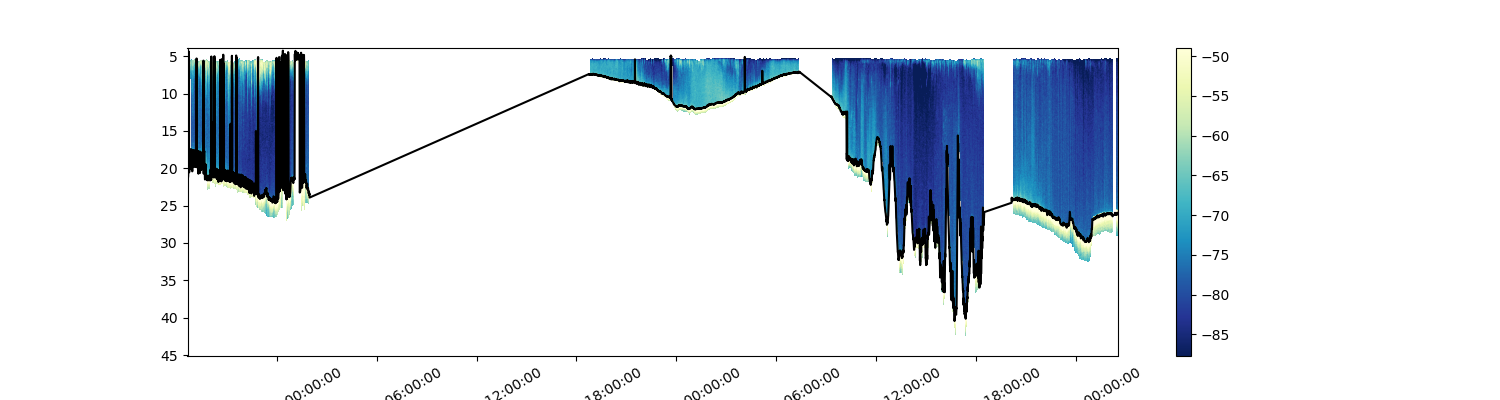

In [15]:
echo_z = eb_em2040_base.build_echogram(
    max_pings   = 10000,
    #max_samples = 30000,
    max_image_size = 10000 * 3000,
    min_time = np.nan,
    max_time = np.nan, 
    min_depth = np.nan,
    max_depth = np.nan,
    linear_mean = False,
    use_range=False,
    verbose=True)

bottom_times = echo_z.get_ping_times_unixtimes()
bottom_dephts = echo_z.bottom_depth_per_ping_time(bottom_times)

print('median:', np.nanmedian(echo_z.get_data()[:,10:50]))

fig_z,ax_z = plot_echogram(echo_z, name="full echogram")

In [16]:
depth_limits = [
    (6,7),
    (7,8),
    (8,9),
    (9,10),
    (10,12),
    (12,14),
    (14,16),
    (16,18),
    (18,20),
    (20,23),
    (23,24),
    (24,26),
    (26,28),
    (28,30),
    (30,32),
    (32,34),
    (34,36),
    (36,38),
    (38,40),

]

depth_limits = [
    (6,7),
    (7,8),
    (8,9),
    (9,10),
    (10,12),
    (12,14),
    (14,16),
    (16,18),
    (18,20),
    (20,22),
    (22,24),
]


def get_depth_layer(echo, depth_limit):
    global bottom,times, lower, upper
    times = echo.get_ping_times_unixtimes()
    bottom = echo.bottom_depth_per_ping_time(times) -1.5
    lower = np.array([depth_limit[1] for _ in times]).astype(float)
    upper = np.array([depth_limit[0] for _ in times]).astype(float)

    for i,(l,u,b) in enumerate(zip(lower,upper,bottom)):
        # if u > b: 
        #     lower[i] = u
        if l > b:
            lower[i] = b
        if lower[i] < u:
            lower[i] = u

    image,extent =  echo.get_echogram_layer(lower_depth=lower, upper_depth=upper, ping_axis='time', sample_axis='depth')
    image[upper >= lower,:] = np.nan
    return image, extent
    

In [18]:
min_time_, max_time_ = mdates.num2date(ax_z.get_xlim())
print(min_time_)
print(max_time_)

max_depth_, min_depth_ = ax_z.get_ylim()
print(min_depth_, max_depth_)

# fig = create_figure("compare", return_ax = False)
# fig.set_size_inches(15,4*len(eb_em2040_angle))
# axes = fig.subplots(nrows=len(eb_em2040_angle),sharex=True, sharey=True)
# axit = iter(axes)

limit_layers = defaultdict(dict)

prg = tqdm(eb_em2040_angle.items(), desc="Processing echograms", total=len(eb_em2040_angle))

for i,(name, eb) in enumerate(prg):
    #print(f"{i}/{len(eb_em2040_angle.items())} {name}")
    prg.set_description(f"Processing echograms [{name}]")
    try:
        #ax_ = next(axit)
        echo_zz = eb.build_echogram(
            max_pings   = 10000,
            max_samples = 30000,
            #max_image_size = 30000 * 3000,
            min_time = min_time_.timestamp(),
            max_time = max_time_.timestamp(), 
            min_depth = min_depth_,
            max_depth = max_depth_,
            linear_mean = False,
            use_range=False,
            verbose=False)
    
        if len(echo_zz._bottom_depths) == 0:
            echo_zz.set_bottom_depths(bottom_depths, bottom_times)
        else:
            bottom_times = echo_zz.get_ping_times_unixtimes()
            bottom_depths = echo_zz.bottom_depth_per_ping_time(bottom_times)
        
        #fig_zz,ax_zz = plot_echogram(echo_zz, name="echogram zz", ax = ax_, interpolation = "nearest")
    
        if True:
            for depth_limit in depth_limits:
                image,extent = get_depth_layer(echo_zz, depth_limit)
                #ax_.imshow(image.transpose(), extent = extent, aspect = "auto", cmap = "Reds", interpolation = "nearest")
        
                limit_layers[f'{depth_limit[0]}-{depth_limit[1]}'][name] = (image, echo_zz.get_ping_times_datetimes())
        
                #print(image.shape, extent)
        #ax_.set_title(name)
        #ax_.set_xlim(min_time_, max_time_)
        #ax_.set_ylim(max_depth_, min_depth_)
    except Exception as e:
        print(f"ERROR[{i}/{len(eb_em2040_angle.items())} {name}]: {e}")

2023-04-21 09:09:58.153309+00:00
2023-04-22 02:24:07.131379+00:00
4.639864298267419 30.18680342833672


Processing echograms:   0%|          | 0/395 [00:00<?, ?it/s]

ERROR[0/395 right -72.0/-71.5]: zero-size array to reduction operation fmin which has no identity
ERROR[89/395 left -28.0/-27.5]: zero-size array to reduction operation fmin which has no identity
ERROR[91/395 left -27.5/-27.0]: zero-size array to reduction operation fmin which has no identity
ERROR[392/395 left 69.5/70.0]: zero-size array to reduction operation fmin which has no identity


In [19]:
import pandas as pd
datas = {}


for depth_limit, layer in tqdm(limit_layers.items()):
    data = []
    for trx, (image, times) in layer.items():
        df = pd.DataFrame()
        df["time"] = times
        df[f"{trx}"] = np.nanmean(image,axis=1)
        df.set_index('time', inplace=True)
        df_resampled = df.resample('5Min')
        #df_error_min = df_resampled.apply(lambda x : np.nanquantile(x, 0.05))
        #df_error_max = df_resampled.apply(lambda x : np.nanquantile(x, 0.95))
        df = df_resampled.apply(np.nanmedian)
        #df['val_min'] = df_error_min
        #df['val_max'] = df_error_max

        data.append(df)

    datas[depth_limit] = pd.concat(data, axis=1)

    


  0%|          | 0/11 [00:00<?, ?it/s]

In [20]:
base_key = 'left base'
angle_keys = list(PSS.keys())
angle_keys = list(eb_em2040_angle.keys())

beam_pattern = defaultdict(pd.DataFrame)

  0%|          | 0/11 [00:00<?, ?it/s]

ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-27.0'
ERROR: 'left 69.5/70.0'
ERROR: 'right -72.0/-71.5'
ERROR: 'left -28.0/-27.5'
ERROR: 'left -27.5/-

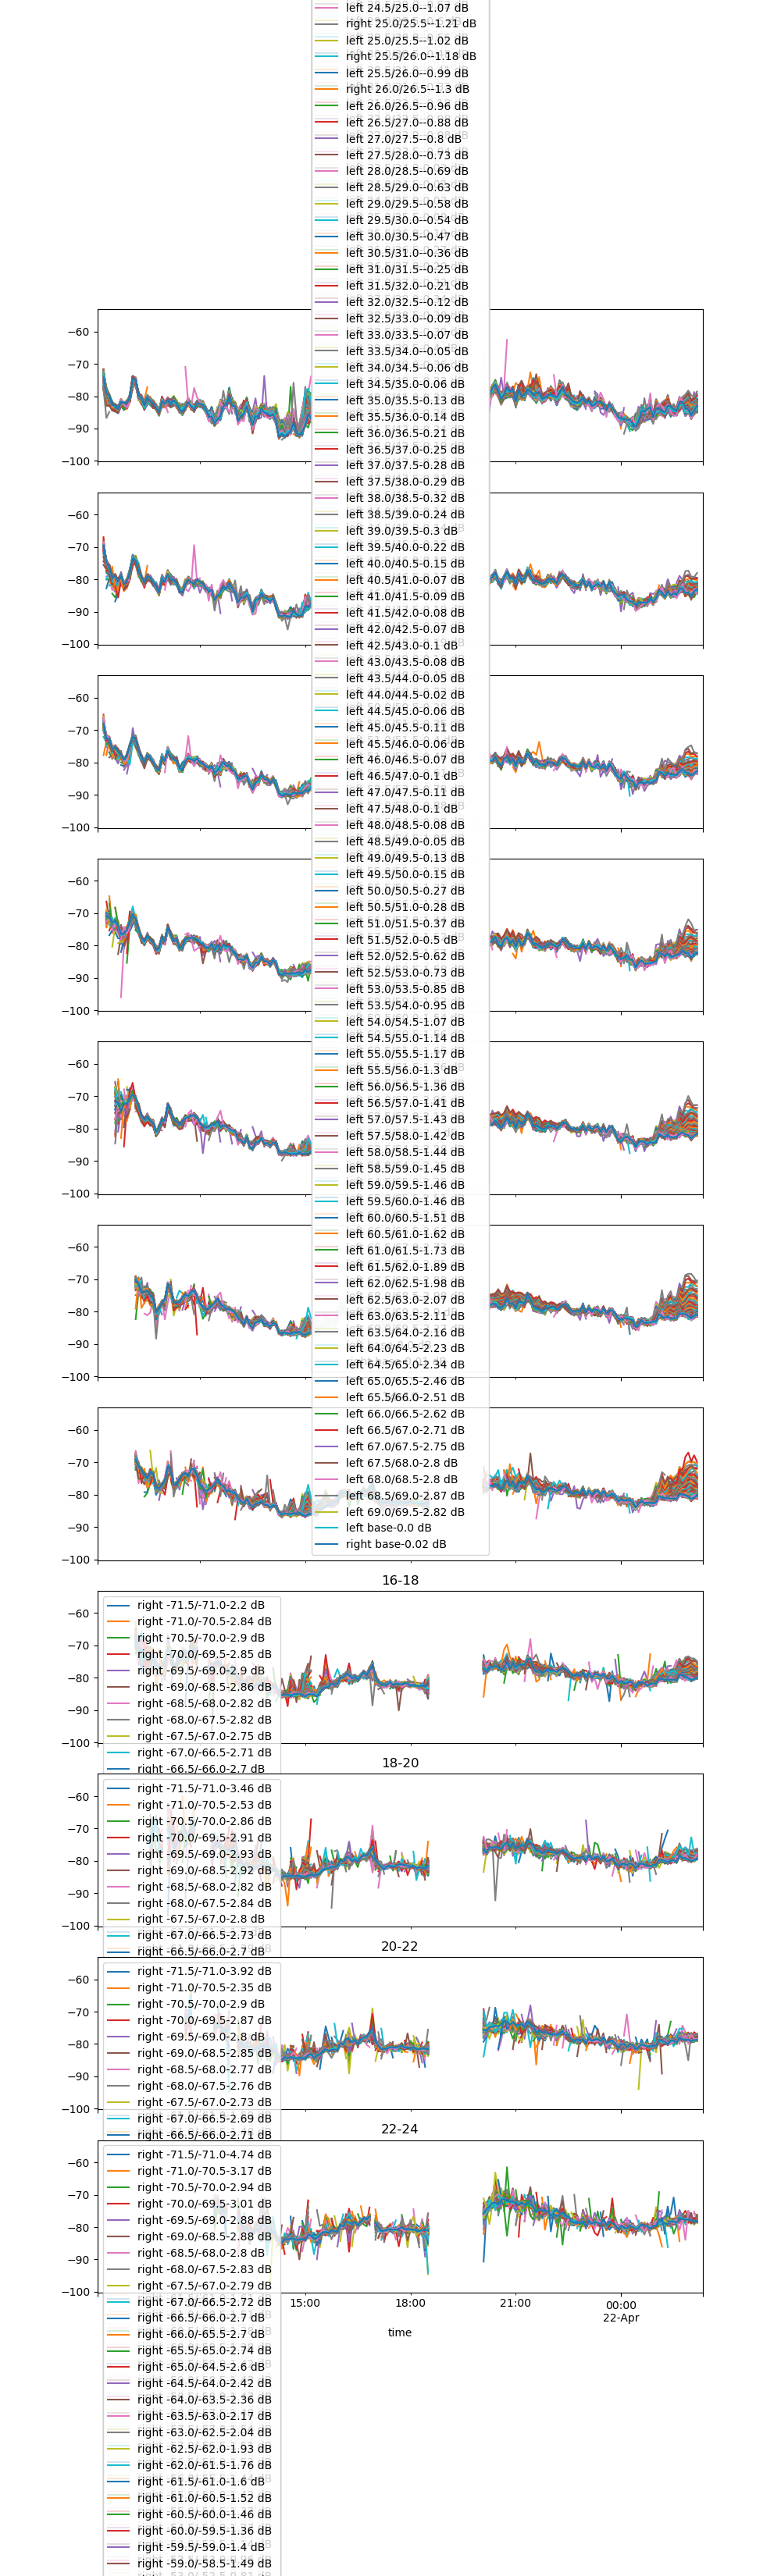

In [21]:
fig = create_figure('layers', return_ax=False)
axes = fig.subplots(nrows=len(datas), sharex=True, sharey=True)
axit = iter(axes)
fig.set_size_inches(10,3*len(axes))

for depth_limit, df in tqdm(datas.items()):
    ax = next(axit)
    ax.set_title(f"{depth_limit}")
    angles = defaultdict(list)
    refs = defaultdict(list)
    refs_val_min = defaultdict(list)
    refs_val_max = defaultdict(list)
    for trx in angle_keys:
        try:
            ref_vals = df[trx] - df[base_key]
            
            ref = np.nanmedian(ref_vals)
            ref_trx = f'{trx}-{round(ref,2)} dB'
            df[ref_trx] = df[trx] - ref
            df.plot(y=ref_trx, ax=ax, label=ref_trx)

            transducer = trx.split()[0]            
            angles[transducer].append(0)
            if not 'base' in trx:
                angles[transducer][-1] = np.mean(np.array(trx.split()[1].split('/')).astype(float))
            refs[transducer].append(ref)
            refs_val_min[transducer].append(np.nanquantile(ref_vals, 0.05))
            refs_val_max[transducer].append(np.nanquantile(ref_vals, 0.95))
        except Exception as e:
            print("ERROR:",e)

    for key in refs.keys():
        beam_pattern[f"{key} {depth_limit}"]['angle'] = angles[key]
        beam_pattern[f"{key} {depth_limit}"]['val'] = refs[key]
        beam_pattern[f"{key} {depth_limit}"]['val_min'] = refs_val_min[key]
        beam_pattern[f"{key} {depth_limit}"]['val_max'] = refs_val_max[key]

ax.legend()

  0%|          | 0/22 [00:00<?, ?it/s]

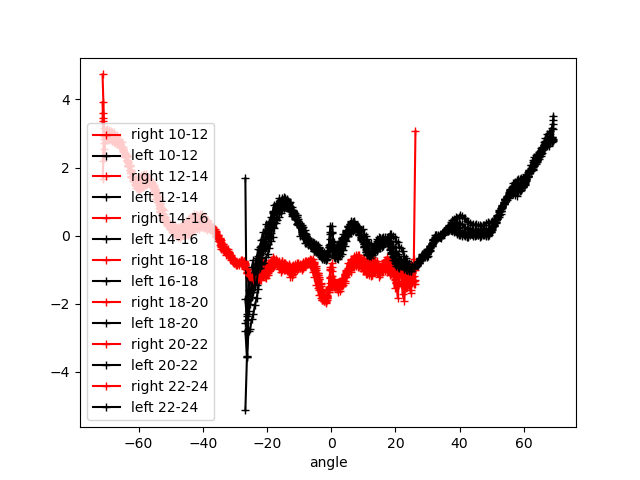

In [22]:
fig,ax = create_figure('beampattern')

for k,df in tqdm(beam_pattern.items()):

    cont=True
    for layer in [
        '10-12',
        '12-14',
        '14-16',
        '16-18',
        '18-20',
        '20-22',
        '22-24',
    ]:
        if layer in k:
            cont = False
            break
    if cont:
        continue

    if k.split()[0] == 'left':
        color = 'black'
    else:
        color = 'red'

    df.iloc[:-1].plot(ax=ax, label=k, y='val', x='angle', marker='+', color=color)


In [26]:
df['angle'].values

array([-71.25, -70.75, -70.25, -69.75, -69.25, -68.75, -68.25, -67.75,
       -67.25, -66.75, -66.25, -65.75, -65.25, -64.75, -64.25, -63.75,
       -63.25, -62.75, -62.25, -61.75, -61.25, -60.75, -60.25, -59.75,
       -59.25, -58.75, -58.25, -57.75, -57.25, -56.75, -56.25, -55.75,
       -55.25, -54.75, -54.25, -53.75, -53.25, -52.75, -52.25, -51.75,
       -51.25, -50.75, -50.25, -49.75, -49.25, -48.75, -48.25, -47.75,
       -47.25, -46.75, -46.25, -45.75, -45.25, -44.75, -44.25, -43.75,
       -43.25, -42.75, -42.25, -41.75, -41.25, -40.75, -40.25, -39.75,
       -39.25, -38.75, -38.25, -37.75, -37.25, -36.75, -36.25, -35.75,
       -35.25, -34.75, -34.25, -33.75, -33.25, -32.75, -32.25, -31.75,
       -31.25, -30.75, -30.25, -29.75, -29.25, -28.75, -28.25, -27.75,
       -27.25, -26.75, -26.25, -25.75, -25.25, -24.75, -24.25, -23.75,
       -23.25, -22.75, -22.25, -21.75, -21.25, -20.75, -20.25, -19.75,
       -19.25, -18.75, -18.25, -17.75, -17.25, -16.75, -16.25, -15.75,
      

  0%|          | 0/22 [00:00<?, ?it/s]

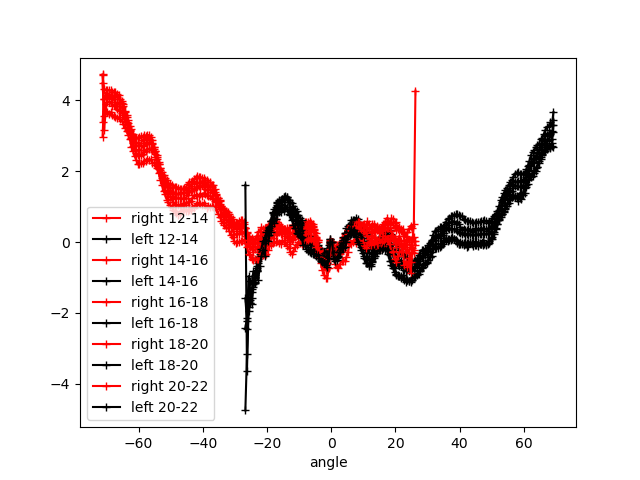

In [29]:
fig,ax = create_figure('beampattern')

for k,df in tqdm(beam_pattern.items()):

    cont=True
    for layer in [
        '10-12',
        '12-14',
        '14-16',
        '16-18',
        '18-20',
        '20-22',
        '22-24',
    ]:
        if layer in k:
            cont = False
            break
    if cont:
        continue

    if k.split()[0] == 'left':
        color = 'black'
    else:
        color = 'red'

    new_df = df.set_index('angle')
    new_df['val'] -= new_df['val'][0.25]
    
    new_df.iloc[:-1].plot(ax=ax, label=k, y='val',  marker='+', color=color)


In [30]:
def conv_angles(ping,angles):
    ab = ping.bottom.get_beam_crosstrack_angles()
    aw = ping.watercolumn.get_beam_crosstrack_angles()
    arg = np.argsort(ab)
    conv = pingtools.vectorinterpolators.LinearInterpolator(ab[arg], aw[arg])
    
    return conv(angles)

def conv_angles_left(angles):
    return conv_angles(em2040_trx2_pings[10000],angles)
def conv_angles_right(angles):
    return conv_angles(em2040_trx1_pings[10000],angles)

  0%|          | 0/22 [00:00<?, ?it/s]

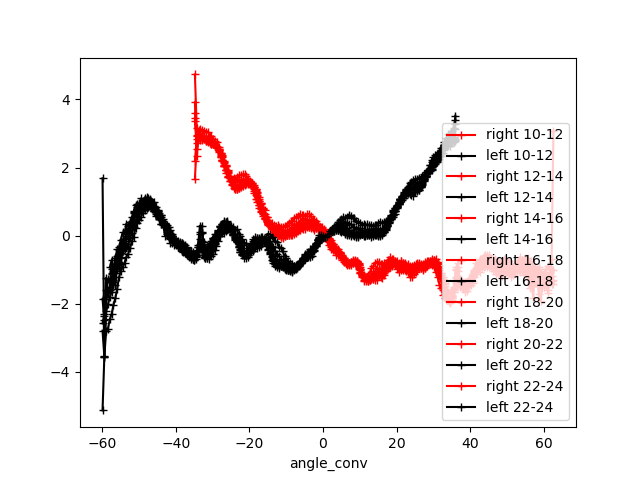

In [34]:

fig,ax = create_figure('beampattern')

for k,df in tqdm(beam_pattern.items()):

    cont=True
    for layer in [
        #'8-9',
        #'9-10',
        '10-12',
        '12-14',
        '14-16',
        '16-18',
        '18-20',
        '20-22',
        '22-24',
    ]:
        if layer in k:
            cont = False
            break
    if cont:
        continue

    if k.split()[0] == 'left':
        color = 'black'
        df['angle_conv'] = conv_angles_left(df['angle'])
    else:
        color = 'red'
        df['angle_conv'] = conv_angles_right(df['angle'])

    df.iloc[:-1].plot(ax=ax, label=k, y='val', x='angle_conv', marker='+', color=color)


  0%|          | 0/22 [00:00<?, ?it/s]

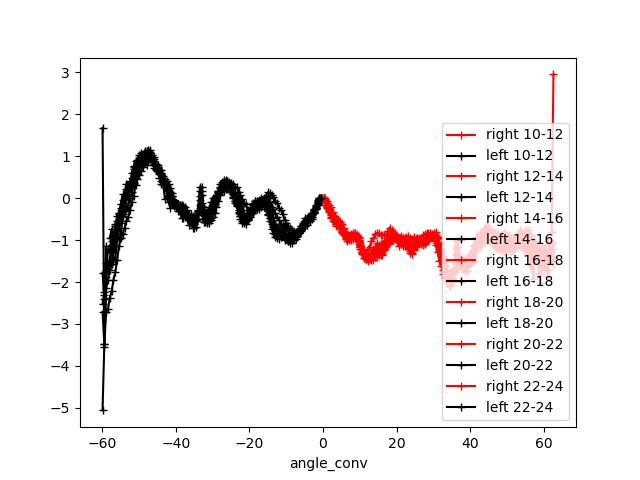

In [38]:
fig,ax = create_figure('beampattern')

for k,df in tqdm(beam_pattern.items()):

    cont=True
    for layer in [
        '10-12',
        '12-14',
        '14-16',
        '16-18',
        '18-20',
        '20-22',
        '22-24',
    ]:
        if layer in k:
            cont = False
            break
    if cont:
        continue

    new_df = df.set_index('angle_conv')
    
    if k.split()[0] == 'left':
        color = 'black'
        new_df = new_df[new_df.index <=0]
    else:
        color = 'red'
        new_df = new_df[new_df.index >=0]

    new_df['val'] -= new_df['val'].values[np.argmin(np.abs(new_df.index))]
    
    new_df.iloc[:-1].plot(ax=ax, label=k, y='val',  marker='+', color=color)


  0%|          | 0/22 [00:00<?, ?it/s]

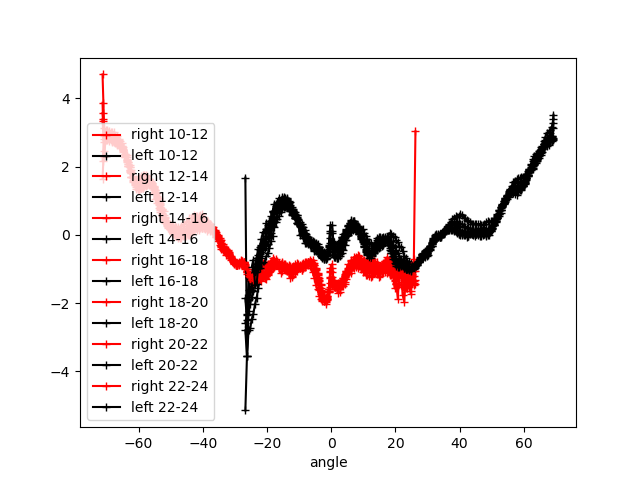

In [37]:
fig,ax = create_figure('beampattern')

for k,df in tqdm(beam_pattern.items()):

    cont=True
    for layer in [
        '10-12',
        '12-14',
        '14-16',
        '16-18',
        '18-20',
        '20-22',
        '22-24',
    ]:
        if layer in k:
            cont = False
            break
    if cont:
        continue

    new_df = df.set_index('angle_conv')
    
    if k.split()[0] == 'left':
        color = 'black'
        new_df = new_df[new_df.index <=0]
    else:
        color = 'red'
        new_df = new_df[new_df.index >=0]

    new_df = df.set_index('angle')
    new_df['val'] -= new_df['val'].values[np.argmin(np.abs(new_df.index))]
    
    new_df.iloc[:-1].plot(ax=ax, label=k, y='val',  marker='+', color=color)


In [86]:
values_left = defaultdict(list)
values_right = defaultdict(list)
values_conv_left = defaultdict(list)
values_conv_right = defaultdict(list)

for k,df in tqdm(beam_pattern.items()):
    cont=True
    for layer in [
        '10-12',
        '12-14',
        '14-16',
        '16-18',
        '18-20',
        '20-22',
        '22-24',
    ]:
        if layer in k:
            cont = False
            break
    if cont:
        continue
    
    if k.split()[0] == 'left':
        for a,c,v in zip(df['angle'].values,df['angle_conv'].values,df['val'].values):
            values_left[a].append(v)
            values_conv_left[c].append(v)
    else:
        for a,c,v in zip(df['angle'].values,df['angle_conv'].values,df['val'].values):
            values_right[a].append(v)
            values_conv_right[c].append(v)

df_left = pd.DataFrame()
df_right = pd.DataFrame()

df_left['angle'] = np.array(list(values_left.keys()))
df_left['angle_conv'] = np.array(list(values_conv_left.keys()))
df_left['vals'] = list(values_left.values())
df_left['vals_median'] = df_left['vals'].apply(lambda x : np.nanmean(x))
df_left['vals_q05'] = df_left['vals'].apply(lambda x : np.nanquantile(x, 0.05))
df_left['vals_q95'] = df_left['vals'].apply(lambda x : np.nanquantile(x, 0.95))
df_left['vals_err'] = df_left['vals_q95'] - df_left['vals_q05']
df_left = df_left.sort_values('angle')

df_right['angle'] = np.array(list(values_right.keys()))
df_right['angle_conv'] = np.array(list(values_conv_right.keys()))
df_right['vals'] = list(values_right.values())
df_right['vals_median'] = df_right['vals'].apply(lambda x : np.nanmean(x))
df_right['vals_q05'] = df_right['vals'].apply(lambda x : np.nanquantile(x, 0.05))
df_right['vals_q95'] = df_right['vals'].apply(lambda x : np.nanquantile(x, 0.95))
df_right['vals_err'] = df_right['vals_q95'] - df_right['vals_q05']
df_right = df_right.sort_values('angle')

  0%|          | 0/22 [00:00<?, ?it/s]

<Axes: xlabel='angle'>

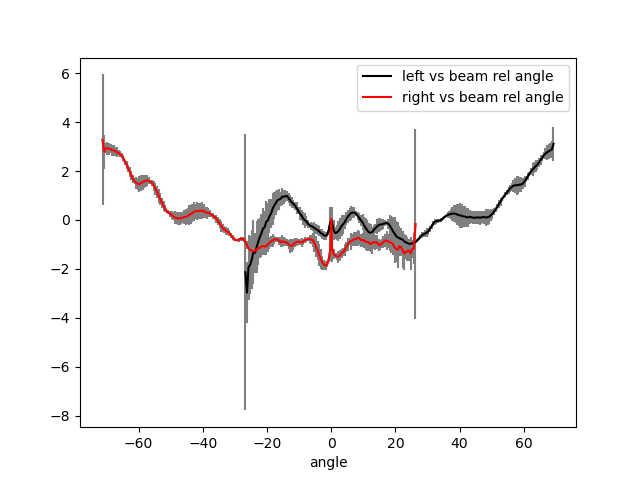

In [87]:
fig,ax = create_figure('beampattern final')

df_left.plot(x='angle', y='vals_median',  ax = ax, yerr='vals_err', color='grey',legend=False)
df_left.plot(x='angle', y='vals_median',  ax = ax, color='black', zorder=10,label='left vs beam rel angle')

df_right.plot(x='angle', y='vals_median',  ax = ax, yerr='vals_err', color='grey',legend=False)
df_right.plot(x='angle', y='vals_median',  ax = ax, color='red', zorder=10,label='right vs beam rel angle')

<Axes: xlabel='angle_conv'>

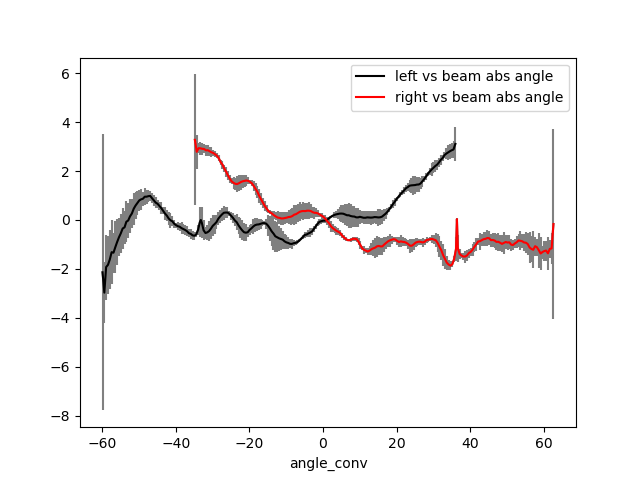

In [88]:
fig,ax = create_figure('beampattern final')

df_left.plot(x='angle_conv', y='vals_median',  ax = ax, yerr='vals_err', color='grey',legend=False)
df_left.plot(x='angle_conv', y='vals_median',  ax = ax, color='black', zorder=10,label='left vs beam abs angle')

df_right.plot(x='angle_conv', y='vals_median',  ax = ax, yerr='vals_err', color='grey',legend=False)
df_right.plot(x='angle_conv', y='vals_median',  ax = ax, color='red', zorder=10,label='right vs beam abs angle')

<Axes: xlabel='angle_conv'>

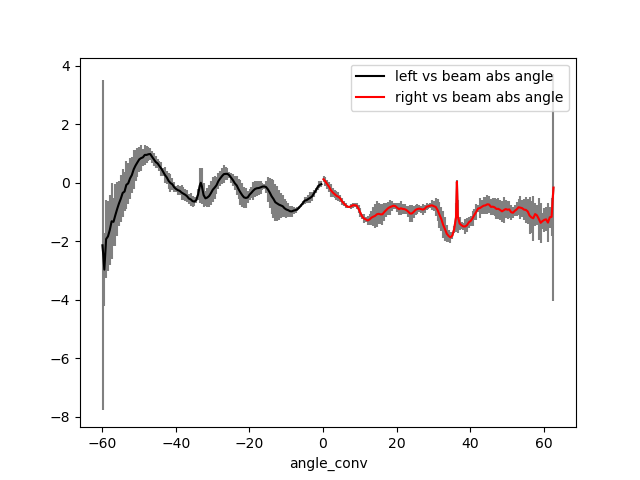

In [90]:
fig,ax = create_figure('beampattern final')

df_left[df_left['angle_conv'] <= 0].plot(x='angle_conv', y='vals_median',  ax = ax, yerr='vals_err', color='grey',legend=False)
df_left[df_left['angle_conv'] <= 0].plot(x='angle_conv', y='vals_median',  ax = ax, color='black', zorder=10,label='left vs beam abs angle')

df_right[df_right['angle_conv'] >= 0].plot(x='angle_conv', y='vals_median',  ax = ax, yerr='vals_err', color='grey',legend=False)
df_right[df_right['angle_conv'] >= 0].plot(x='angle_conv', y='vals_median',  ax = ax, color='red', zorder=10,label='right vs beam abs angle')

In [94]:
df_left.to_hdf('beam-offsets.hd5', 'TRX-2031')
df_right.to_hdf('beam-offsets.hd5', 'TRX-2004')

In [91]:
em2040_trx1_pings[0].get_channel_id()

'TRX-2004'

In [92]:
em2040_trx2_pings[0].get_channel_id()

'TRX-2031'

In [96]:
df_left = pd.read_hdf('beam-offsets.hd5','TRX-2031')
df_right = pd.read_hdf('beam-offsets.hd5','TRX-2004')

<Axes: xlabel='angle_conv'>

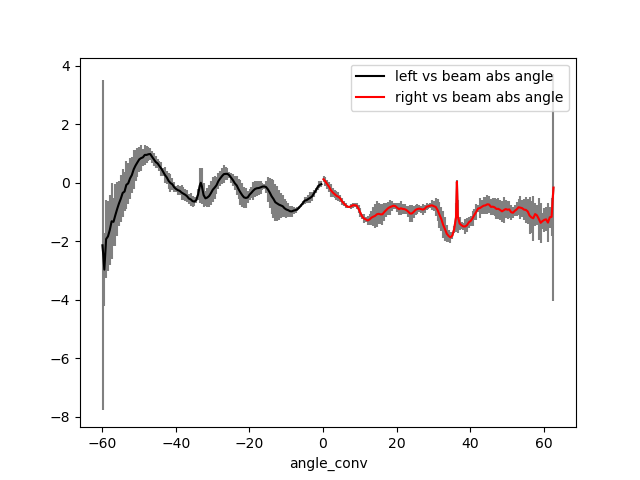

In [97]:
fig,ax = create_figure('beampattern final')

df_left[df_left['angle_conv'] <= 0].plot(x='angle_conv', y='vals_median',  ax = ax, yerr='vals_err', color='grey',legend=False)
df_left[df_left['angle_conv'] <= 0].plot(x='angle_conv', y='vals_median',  ax = ax, color='black', zorder=10,label='left vs beam abs angle')

df_right[df_right['angle_conv'] >= 0].plot(x='angle_conv', y='vals_median',  ax = ax, yerr='vals_err', color='grey',legend=False)
df_right[df_right['angle_conv'] >= 0].plot(x='angle_conv', y='vals_median',  ax = ax, color='red', zorder=10,label='right vs beam abs angle')